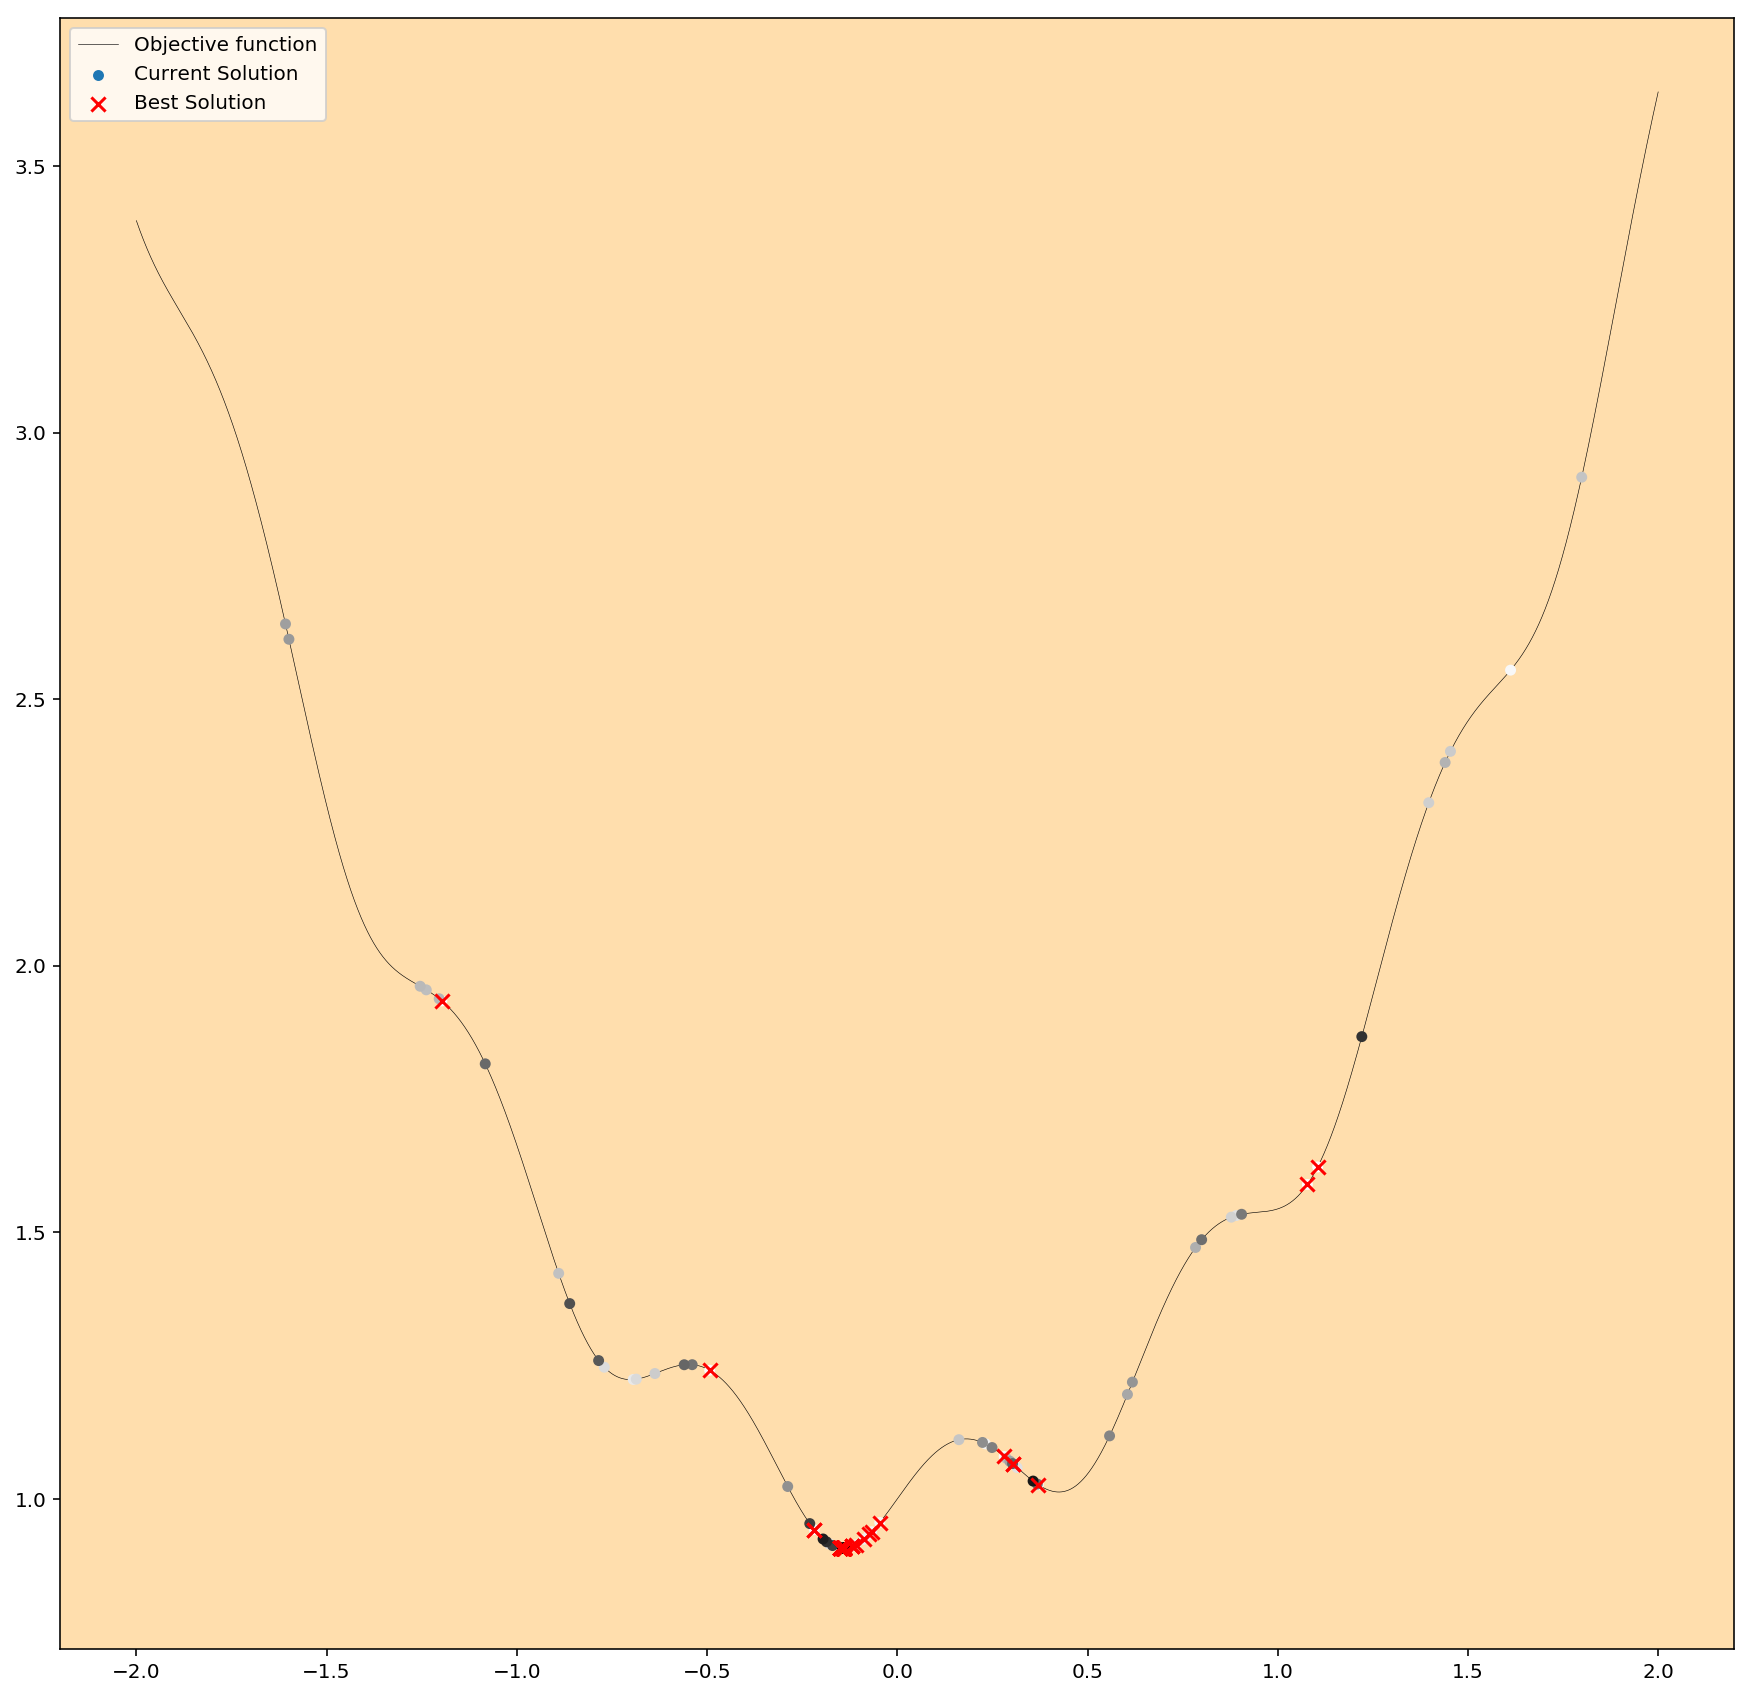

In [49]:
import numpy as np
import re
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%run PlottingMethods.ipynb

# Running code

##      <span style="color:orange">A.  LSA</span>

###      <span style="color:green"><u>Min Function</u></span>

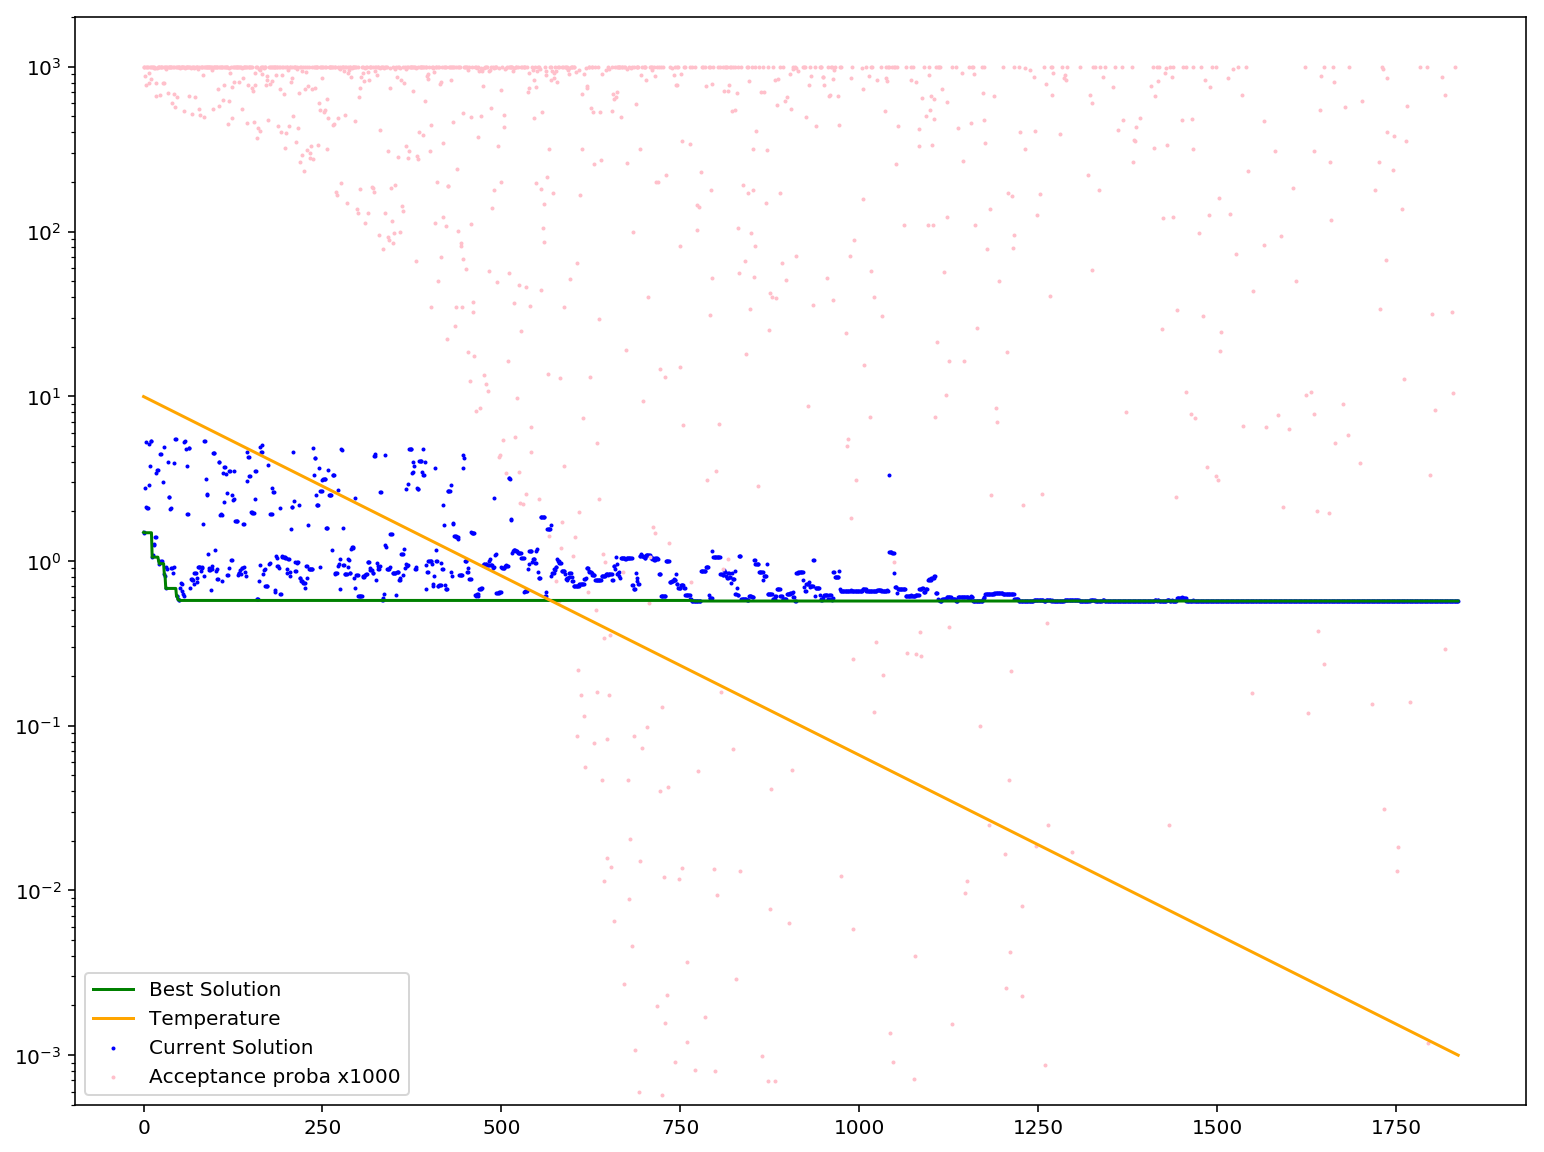

In [50]:
path = "../java/SimulatedAnnealing/GraphData/LSA_MinFunction.txt"
best_y, curr_y, acceptance_pb, acc_best_sol, temp, runtime, iteration_nbr = processDataLSA(path)
drawPlotLSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, 1000)

----
###      <span style="color:green"><u>Traveling Salesman Problem</u></span>

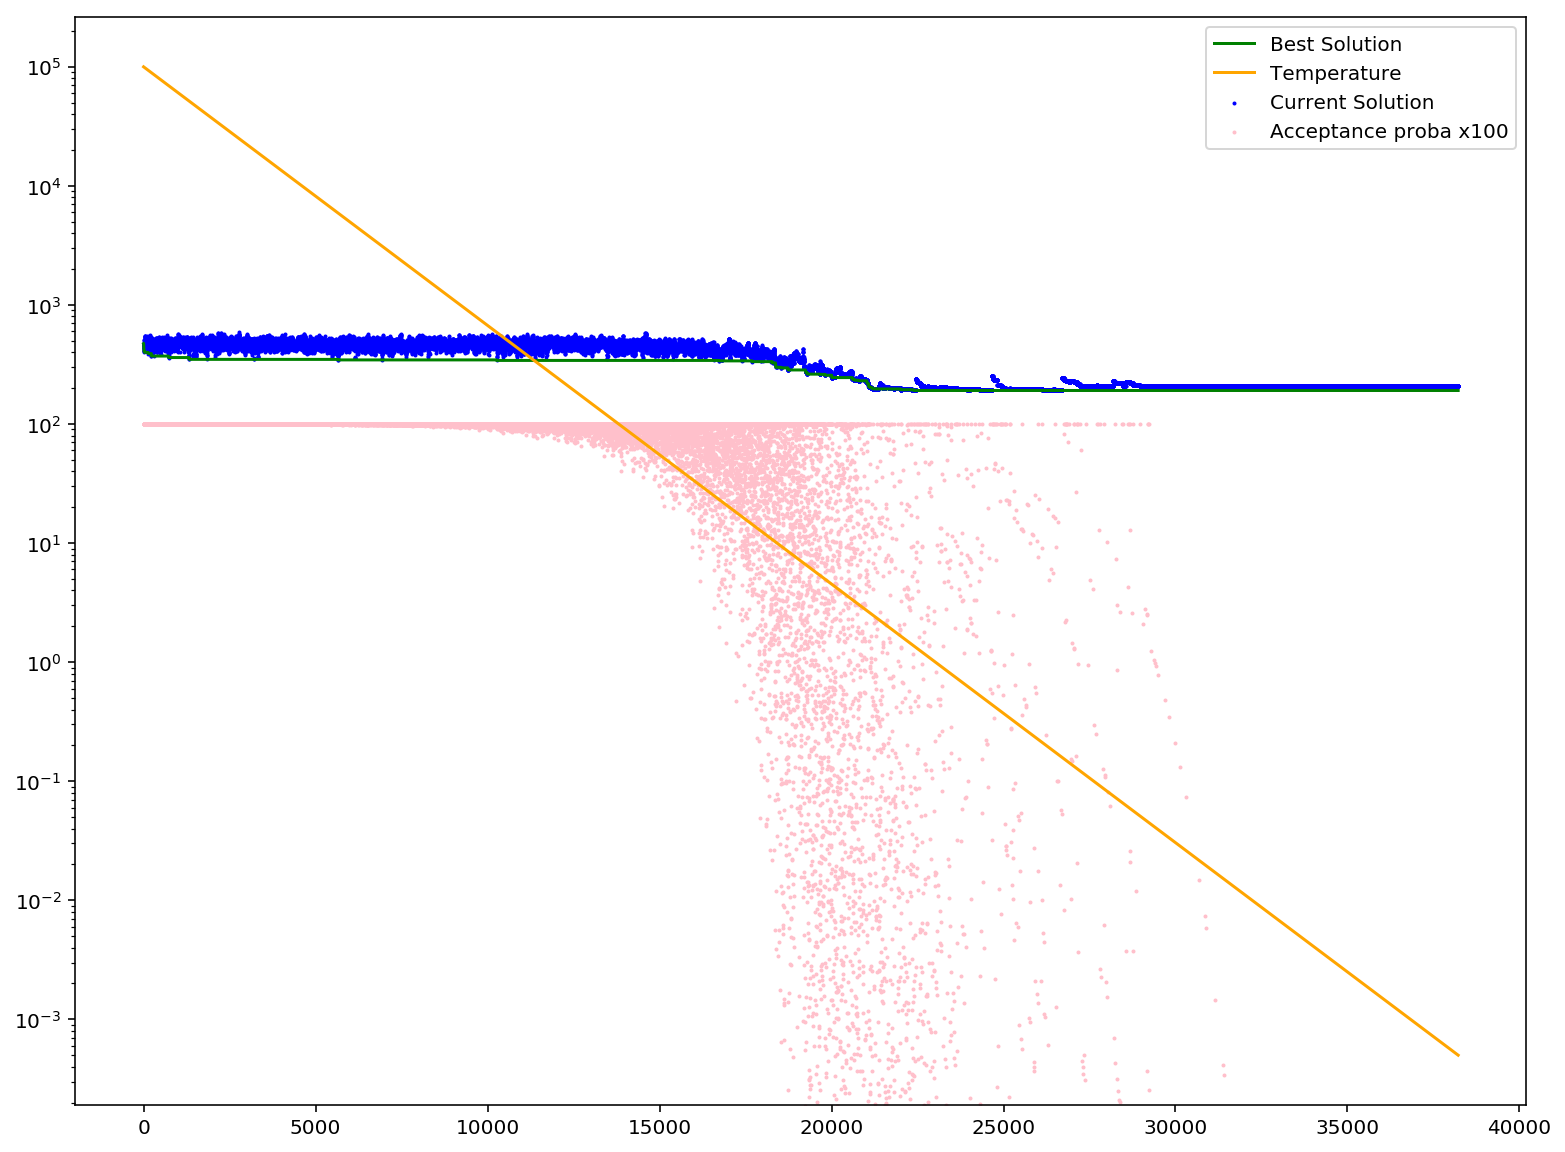

In [51]:
path = "../java/SimulatedAnnealing/GraphData/LSA_TSP.txt"
best_y, curr_y, acceptance_pb, acc_best_sol, temp, runtime, iteration_nbr = processDataLSA(path)
drawPlotLSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, 100)

----

##      <span style="color:orange">B.  DSA</span>

###      <span style="color:green"><u>Min Function</u></span>

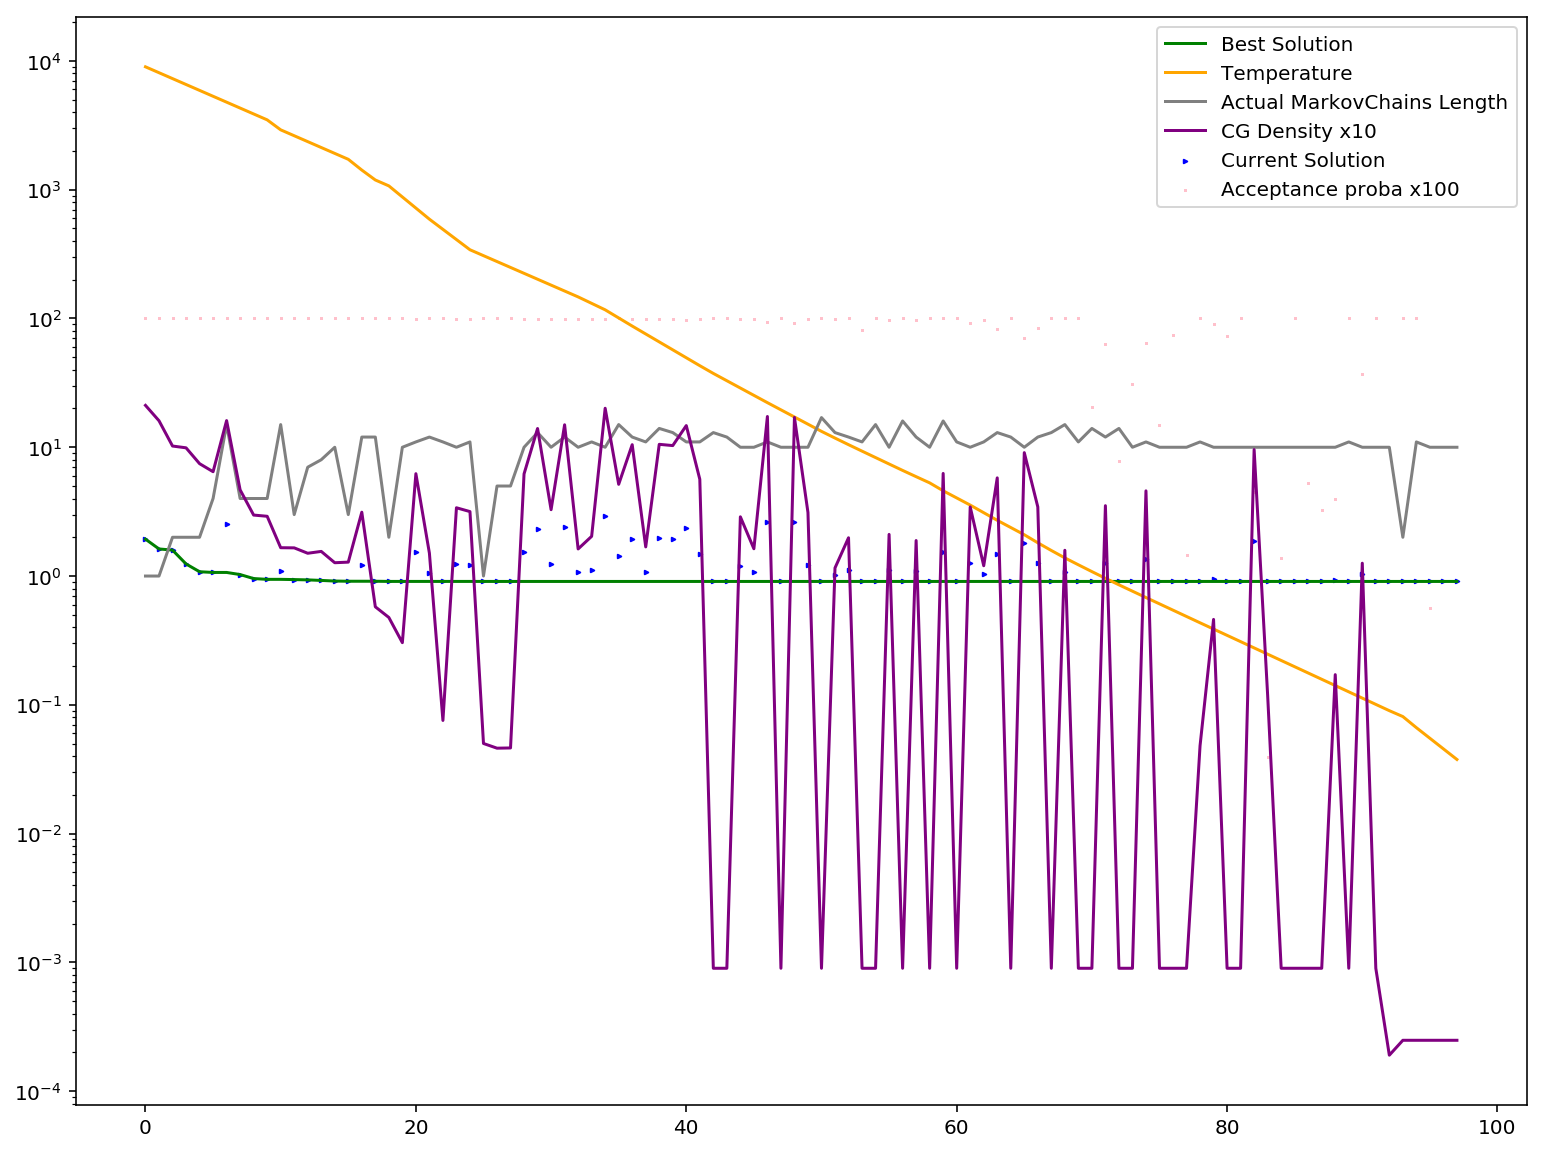

In [52]:
path = "../java/SimulatedAnnealing/GraphData/DSA_MinFunction.txt"
best_y, curr_y, acceptance_pb, acc_best_sol, temp, density, markov_len, runtime, iteration_nbr = processDataDSA(path)
drawPlotDSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, density, markov_len, prob_factor=100, density_factor=10)

In [53]:

drawSolutionDSAMF(curr_y, best_y, curr_x)

NameError: name 'pr' is not defined